In [1]:
from timeit import timeit
from matplotlib import pyplot as plt

In [2]:
def binary_search(arr, low, high, x): 
    if high < low:
        return -1
    mid = (high + low) // 2
    if arr[mid] == x: 
        return mid 
    if arr[mid] > x: 
        return binary_search(arr, low, mid - 1, x) 
    return binary_search(arr, mid + 1, high, x)

In [3]:
def ternary_search(arr, low, high, x): 
    if high < low:
        return -1
    p = (high - low) // 3
    mid1 = low + p
    mid2 = high - p
    if arr[mid1] == x: 
        return mid1
    if arr[mid2] == x:
        return mid2
    if arr[mid1] > x: 
        return ternary_search(arr, low, mid1 - 1, x) 
    if arr[mid2] > x:
        return ternary_search(arr, mid1 + 1, mid2 - 1, x) 
    return ternary_search(arr, mid2 + 1, high, x) 

In [4]:
def quaternary_search(arr, low, high, x): 
    if high < low:
        return -1
    p = (high - low) // 4
    mid1 = low + p
    mid2 = low + 2*p
    mid3 = low + 3*p
    if arr[mid1] == x: 
        return mid1
    if arr[mid2] == x:
        return mid2
    if arr[mid3] == x:
        return mid3
    if arr[mid1] > x: 
        return ternary_search(arr, low, mid1 - 1, x) 
    if arr[mid2] > x:
        return ternary_search(arr, mid1 + 1, mid2 - 1, x) 
    if arr[mid3] > x:
        return ternary_search(arr, mid2 + 1, mid3 - 1, x) 
    return ternary_search(arr, mid3 + 1, high, x) 

In [5]:
n_min = 1
n_max = 10000
st = 100
iterations = 1000

t_binary = list()
t_ternary = list()
t_quaternary = list()
for n in range(n_min, n_max, st):
    sum_binary = list()
    sum_ternary = list()
    sum_quaternary = list()

    for i in range(1, iterations):
        arr = list(range(1, n))
        sum_binary.append(timeit(lambda: binary_search(arr, 0, len(arr)-1, n_max), number = 1))
        sum_ternary.append(timeit(lambda: ternary_search(arr, 0, len(arr)-1, n_max), number = 1))
        sum_quaternary.append(timeit(lambda: quaternary_search(arr, 0, len(arr)-1, n_max), number = 1))
        
    t_binary.append(sorted(sum_binary)[iterations // 2])
    t_ternary.append(sorted(sum_ternary)[iterations // 2])
    t_quaternary.append(sorted(sum_quaternary)[iterations // 2])

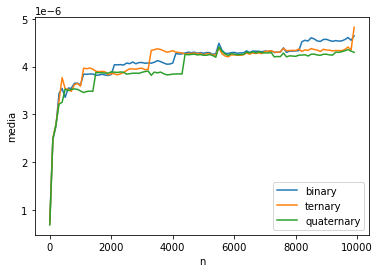

In [6]:
x = range(n_min, n_max, st)
plt.xlabel('n')
plt.ylabel('media')
plt.plot(x, t_binary, label = 'binary')
plt.plot(x, t_ternary, label = 'ternary')
plt.plot(x, t_quaternary, label = 'quaternary')
plt.legend()